# Data analysis of cloud pictures
### Matej Cief, Tomas Mizera

---

### Cloud object detection

In [20]:
import os
import numpy as np
import pandas as pd
from PIL import Image

Data come from [this kaggle competition](https://www.kaggle.com/c/understanding_cloud_organization). They are represented as pictures with corresponding run-length encoded masks that describe specific category of cloud in the pictures.

|data| description|
|:---|:---|
|`train_images/`|directory with train images  |
|`train.csv`|masks for train images  |
|`test_images/`|directory with test images  |
|`sample_submission.csv`| csv showcasing sample output for kaggle competition|

Clouds are being separated into four main categories: `Fish`, `Flower`, `Gravel` and `Sugar`

In [34]:
#load data
train_x = os.listdir('../data/train_images/')
train_y = pd.read_csv('../data/train.csv')
test_x = os.listdir('../data/test_images/')
categories = ['Fish', 'Flower', 'Gravel', 'Sugar']

---

### Description of data

#### `train_x` - directory with train images

Example train data:

![example train image](../data/train_images/b085f55.jpg "example train image")

In [10]:
train_x[:5]

['203210a.jpg', 'b085f55.jpg', '5275b51.jpg', '4e6296d.jpg', '8acb403.jpg']

In [11]:
len(train_x)

5546

There are 5546 images in the dataset and all of the images are provided in `.jpg` file format

In [21]:
image = Image.open("../data/train_images/b085f55.jpg")
image.size

(2100, 1400)

Each picture has 2100x1400 pixels resolution

---

#### `train_y` mask representation 

`train_y` holds information regarding occurence of conrete cloud type in a specific image. Each image has four rows in this DataFrame, each row belongs to one of a types (Fish, Flower, Gravel and Sugar). 

Column **EncodedPixels** is run-length encoded value ([example, video explanation](https://www.youtube.com/watch?v=Yl50cJScObI)) that describes where is the given cloud category placed on the image. 

In [12]:
train_y.head(6)

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...
5,002be4f.jpg_Flower,1339279 519 1340679 519 1342079 519 1343479 51...


In [35]:
train_y.shape[0]//len(categories)

5546

Number of labels is the same as the number of images in `train_x`

In [13]:
# we took this function transforming run-length encoding to numpy array
# from https://www.kaggle.com/ekhtiar/eda-find-me-in-the-clouds

def rle_to_mask(rle_string, width, height):
    '''
    convert RLE(run length encoding) string to numpy array

    Parameters: 
    rle_string (str): string of rle encoded mask
    height (int): height of the mask
    width (int): width of the mask

    Returns: 
    numpy.array: numpy array of the mask
    '''
    
    rows, cols = height, width
    
    if rle_string == -1:
        return np.zeros((height, width))
    else:
        rle_numbers = [int(num_string) for num_string in rle_string.split(' ')]
        rle_pairs = np.array(rle_numbers).reshape(-1,2)
        img = np.zeros(rows*cols, dtype=np.uint8)
        for index, length in rle_pairs:
            index -= 1
            img[index:index+length] = 255
        img = img.reshape(cols,rows)
        img = img.T
        return img

In [26]:
mask = rle_to_mask(train_y.EncodedPixels[0], 2100, 1400)
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Example of mask

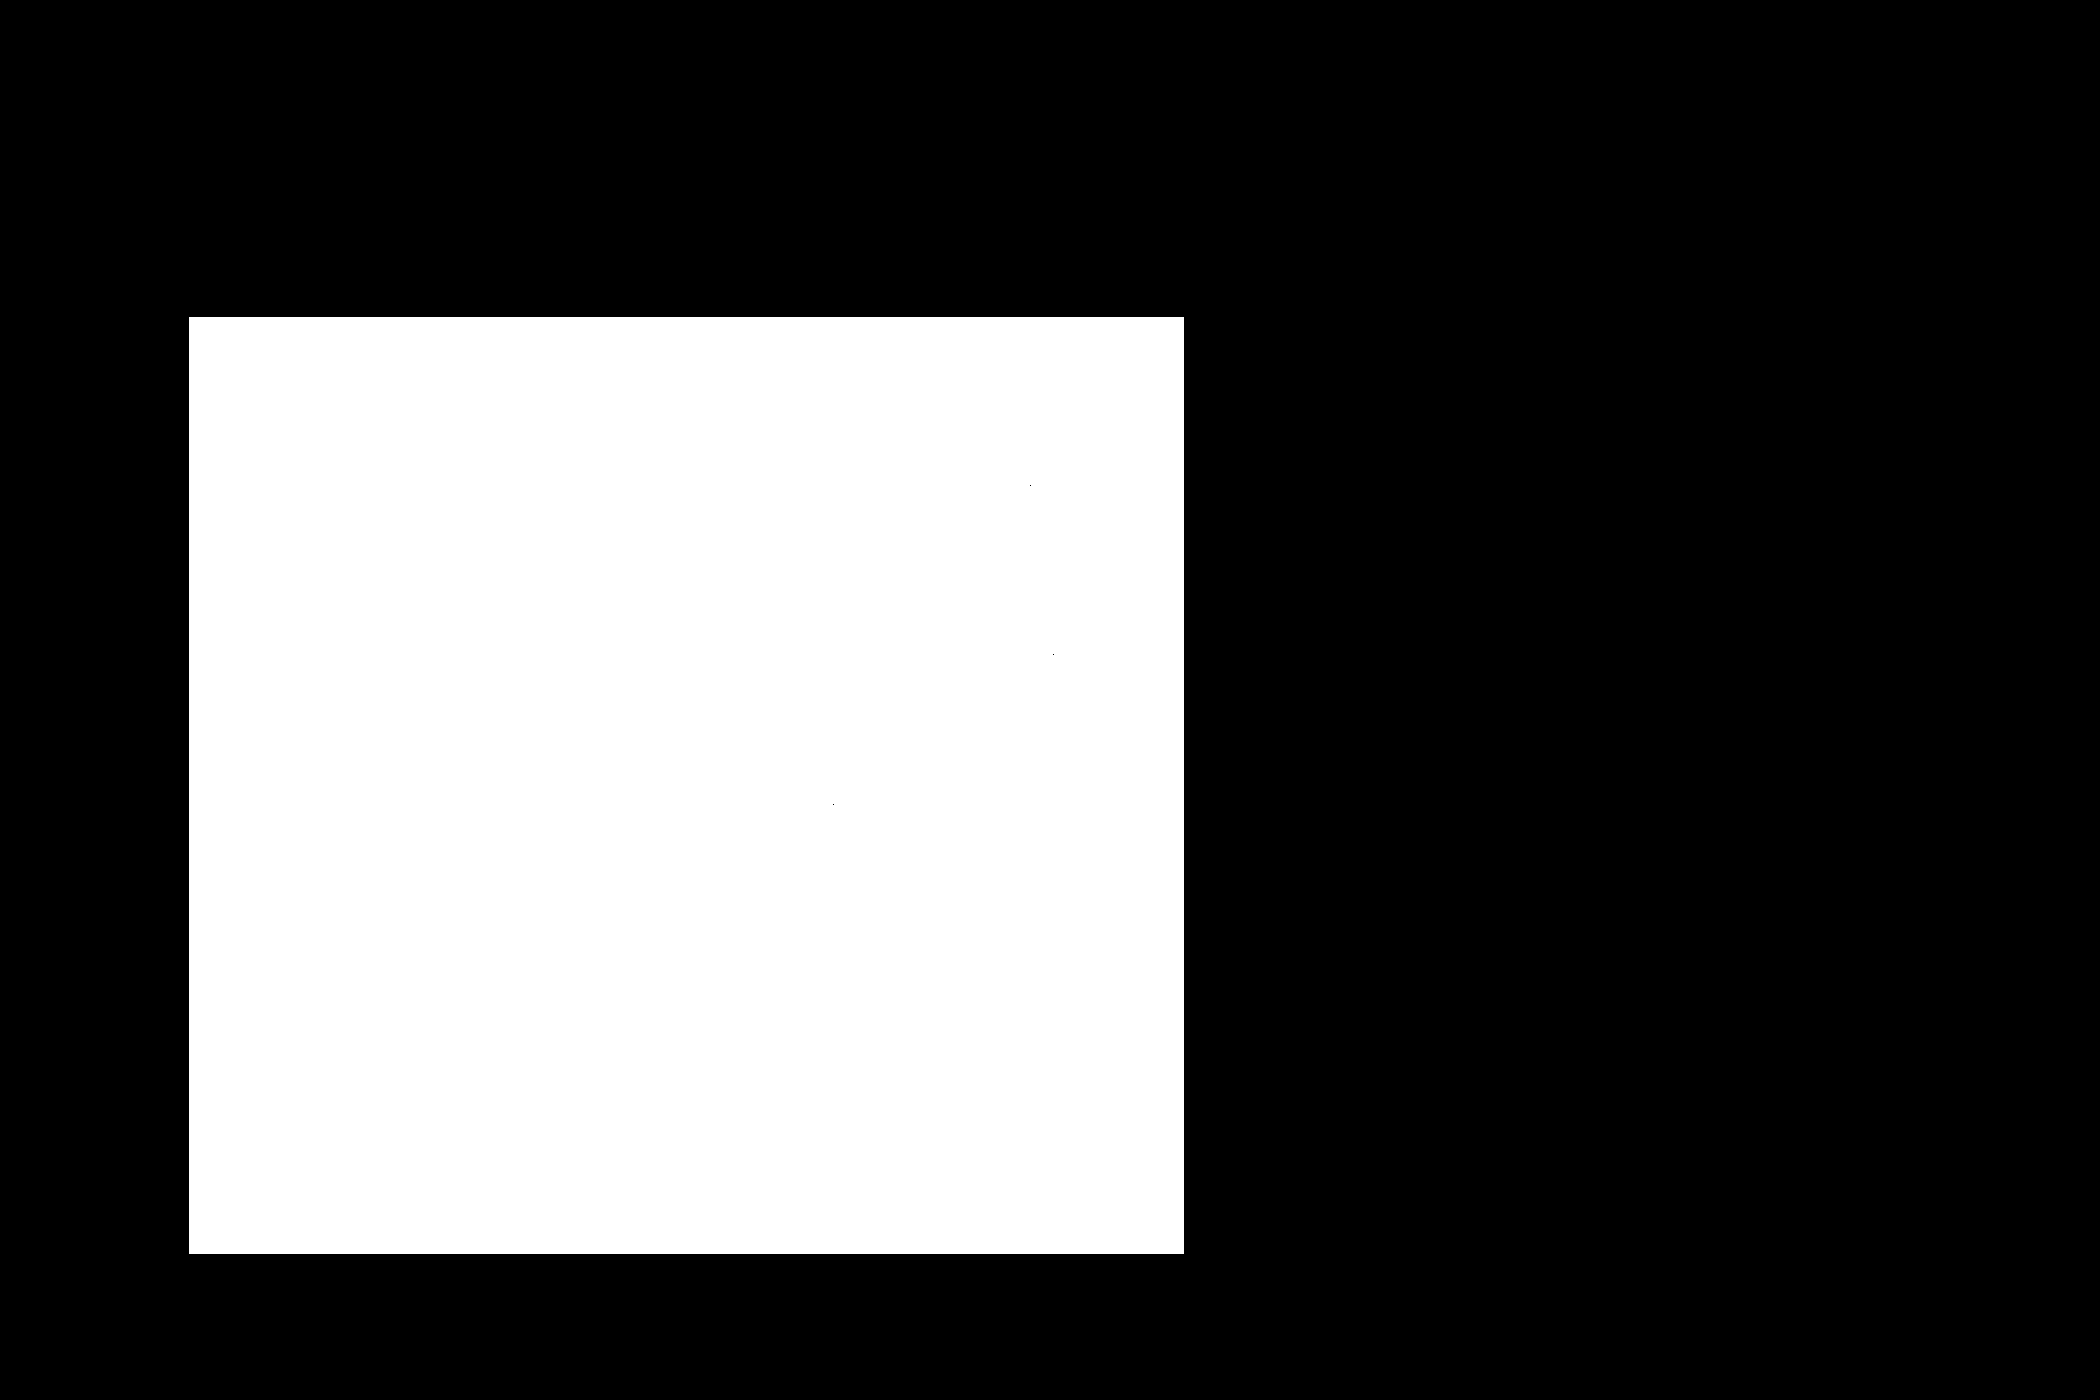

In [28]:
Image.fromarray(mask)

In [ ]:
train_x_file_names = os.listdir('../data/train_images')
train_x_file_names[0:5]

In [ ]:
train_y = pd.read_csv('../data/train.csv')
train_y

In [ ]:
pd.DataFrame(train_y.apply(lambda x: x['Image_Label'].split('.'), axis=1))

In [ ]:
train_y[['images']] = pd.DataFrame(train_y.apply(lambda x: x['Image_Label'].split('.')[0], axis=1))
train_y[['labels']] = pd.DataFrame(train_y.apply(lambda x: x['Image_Label'].split('.')[1].split('_')[1], axis=1))

In [ ]:
train_y.head(5)

In [ ]:
len(train_y.groupby(by='images').filter(lambda x: x['EncodedPixels'].notnull().sum() == 1)) / 4

In [ ]:
train_y.shape[0] 

In [ ]:
train_y['image', 'label'] = train_y.Image_Label.str.split('.')

In [1]:
TRAIN_PATH = '../data/train_images/'
TEST_PATH = '../data/test_images/'

In [2]:
train_fns = train_x_file_names

NameError: name 'train_x_file_names' is not defined

In [3]:
len(train_x_file_names)

NameError: name 'train_x_file_names' is not defined

In [ ]:
train_y.EncodedPixels

In [ ]:
# imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import basic libraries
import os
from glob import glob

# import plotting
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import matplotlib
import seaborn as sns

# import image manipulation
from PIL import Image
import imageio

In [ ]:
train_df = pd.read_csv('../data/train.csv')

In [ ]:
def get_image_sizes(train = True):
    '''
    Function to get sizes of images from test and train sets.
    INPUT:
        train - indicates whether we are getting sizes of images from train or test set
    '''
    if train:
        path = TRAIN_PATH
    else:
        path = TEST_PATH
        
    widths = []
    heights = []
    
    images = sorted(glob(path + '*.jpg'))
    
    max_im = Image.open(images[0])
    min_im = Image.open(images[0])
        
    for im in range(0, len(images)):
        image = Image.open(images[im])
        width, height = image.size
        
        if len(widths) > 0:
            if width > max(widths):
                max_im = image

            if width < min(widths):
                min_im = image

        widths.append(width)
        heights.append(height)
        
    return widths, heights, max_im, min_im

In [ ]:
# get sizes of images from test and train sets
train_widths, train_heights, max_train, min_train = get_image_sizes(train = True)
test_widths, test_heights, max_test, min_test = get_image_sizes(train = False)

print('Maximum width for training set is {}'.format(max(train_widths)))
print('Minimum width for training set is {}'.format(min(train_widths)))
print('Maximum height for training set is {}'.format(max(train_heights)))
print('Minimum height for training set is {}'.format(min(train_heights)))

In [ ]:
# helper function to get a string of labels for the picture
def get_labels(image_id):
    ''' Function to get the labels for the image by name'''
    im_df = train_df[train_df['Image'] == image_id].fillna('-1')
    im_df = im_df[im_df['EncodedPixels'] != '-1'].groupby('Label').count()
    
    index = im_df.index
    all_labels = ['Fish', 'Flower', 'Gravel', 'Sugar']
    
    labels = ''
    
    for label in all_labels:
        if label in index:
            labels = labels + ' ' + label
    
    return labels

# function to plot a grid of images and their labels
def plot_training_images(width = 5, height = 2):
    """
    Function to plot grid with several examples of cloud images from train set.
    INPUT:
        width - number of images per row
        height - number of rows

    OUTPUT: None
    """
    
    # get a list of images from training set
    images = sorted(glob(TRAIN_PATH + '*.jpg'))
    
    fig, axs = plt.subplots(height, width, figsize=(width * 3, height * 3))
    
    # create a list of random indices 
    rnd_indices = rnd_indices = [np.random.choice(range(0, len(images))) for i in range(height * width)]
    
    for im in range(0, height * width):
        # open image with a random index
        image = Image.open(images[rnd_indices[im]])
        
        i = im // width
        j = im % width
        
        # plot the image
        axs[i,j].imshow(image) #plot the data
        axs[i,j].axis('off')
        axs[i,j].set_title(get_labels(images[rnd_indices[im]].split('/')[-1]))

    # set suptitle
    plt.suptitle('Sample images from the train set')
    plt.show()

In [ ]:
plot_training_images()

In [ ]:
def rle_to_mask(rle_string, width, height):
    '''
    convert RLE(run length encoding) string to numpy array

    Parameters: 
    rle_string (str): string of rle encoded mask
    height (int): height of the mask
    width (int): width of the mask

    Returns: 
    numpy.array: numpy array of the mask
    '''
    
    rows, cols = height, width
    
    if rle_string == -1:
        return np.zeros((height, width))
    else:
        rle_numbers = [int(num_string) for num_string in rle_string.split(' ')]
        rle_pairs = np.array(rle_numbers).reshape(-1,2)
        img = np.zeros(rows*cols, dtype=np.uint8)
        for index, length in rle_pairs:
            index -= 1
            img[index:index+length] = 255
        img = img.reshape(cols,rows)
        img = img.T
        return img

In [ ]:
from __future__ import print_function
import numpy as np

def valid_imshow_data(data):
    data = np.asarray(data)
    if data.ndim == 2:
        return True
    elif data.ndim == 3:
        if 3 <= data.shape[2] <= 4:
            return True
        else:
            print('The "data" has 3 dimensions but the last dimension '
                  'must have a length of 3 (RGB) or 4 (RGBA), not "{}".'
                  ''.format(data.shape[2]))
            return False
    else:
        print('To visualize an image the data must be 2 dimensional or '
              '3 dimensional, not "{}".'
              ''.format(data.ndim))
        return False

In [ ]:
def get_mask(line_id, shape = (2100, 1400)):
    '''
    Function to visualize the image and the mask.
    INPUT:
        line_id - id of the line to visualize the masks
        shape - image shape
    RETURNS:
        np_mask - numpy segmentation map
    '''
    # replace null values with '-1'
    im_df = train_df.fillna('-1')
    
    # convert rle to mask
    rle = im_df.loc[line_id]['EncodedPixels']
    if rle != '-1':
        np_mask = rle_to_mask(rle, shape[0], shape[1])
        np_mask = np.clip(np_mask, 0, 1)
    else:
        # empty mask
        np_mask = np.zeros((shape[0],shape[1]), dtype=np.uint8)
        
    return np_mask

# helper function to get segmentation mask for an image by filename
def get_mask_by_image_id(image_id, label):
    '''
    Function to visualize several segmentation maps.
    INPUT:
        image_id - filename of the image
    RETURNS:
        np_mask - numpy segmentation map
    '''
    im_df = train_df[train_df['Image'] == image_id.split('/')[-1]].fillna('-1')

    image = np.asarray(Image.open(image_id))

    rle = im_df[im_df['Label'] == label]['EncodedPixels'].values[0]
    if rle != '-1':
        np_mask = rle_to_mask(rle, np.asarray(image).shape[1], np.asarray(image).shape[0])
        np_mask = np.clip(np_mask, 0, 1)
    else:
        # empty mask
        np_mask = np.zeros((np.asarray(image).shape[0], np.asarray(image).shape[1]), dtype=np.uint8)
        
    return np_mask

def visualize_image_with_mask(line_id):
    '''
    Function to visualize the image and the mask.
    INPUT:
        line_id - id of the line to visualize the masks
    '''
    # replace null values with '-1'
    im_df = train_df.fillna('-1')
    
    # get segmentation mask
    np_mask = get_mask(line_id)
    
    # open the image
    image = Image.open(TRAIN_PATH + im_df.loc[line_id]['Image'])

    # create segmentation map
    segmap = SegmentationMapOnImage(np_mask, np_mask.shape, nb_classes=2)
    
    # visualize the image and map
    side_by_side = np.hstack([
        segmap.draw_on_image(np.asarray(image))
    ]).reshape(np.asarray(image).shape)

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.axis('off')
    plt.title(im_df.loc[line_id]['Label'])
    
    ax.imshow(side_by_side)